In [1]:
import pandas as pd
import os
import warnings
import graphtools as gt
import numpy as np
import time
import scprep
import datetime
import scanpy as sc
from scipy import sparse
import sys
sys.path.append('/home/ngr4/project/scripts/')
import utils
import magic

In [2]:
pdfp = '/home/ngr4/project/scnd/data/processed'
pfp = '/home/ngr4/project/scnd/results/'
sc.settings.figdir = pfp

adata = sc.read(os.path.join(pdfp, 'ubc.h5ad'))

In [8]:
###############################################
# DGE
###############################################

grand_t = time.time()

fname = 'ubc_subtype'

dge = pd.DataFrame()
print('\nstarting {}\n'.format(fname))
start_t=time.time()


group1 = 'ubc_subtype'
group2 = 'timepoint'
for c in adata.obs[group1].unique():
    for tpoint in ['5wk', '12wk', '18wk', '24wk', '30wk']:
        X = adata[((adata.obs[group1]==c) & (adata.obs[group2]==tpoint) & (adata.obs['genotype']=='WT')), :].layers['imputed']
        X_mut = adata[((adata.obs[group1]==c) & (adata.obs[group2]==tpoint) & (adata.obs['genotype']=='SCA1')), :].layers['imputed']

        X = np.asarray(X)
        X_mut = np.asarray(X_mut)

        print('    Ncells in X:{}'.format(X.shape[0]))
        print('    Ncells in X_mut:{}\n'.format(X_mut.shape[0]))

        p = utils.mwu(X,X_mut,adata.var_names) # directionality doesn't matter
        emd = scprep.stats.differential_expression(X_mut,X,
                                                   measure = 'emd',
                                                   direction='both',
                                                   gene_names=adata.var_names,
                                                   n_jobs=-1)
        emd['Gene']=emd.index
        emd=emd.drop(columns='rank')
        fc = utils.log2aveFC(X_mut,X,adata.var_names.to_list())
        gene_mismatch = fc['Gene'].isin(p['Gene'])
        if gene_mismatch.any():
            fc = fc.loc[gene_mismatch,:]
            warnings.warn('Warning: {} genes dropped due to p-val NA.'.format((gene_mismatch==False).sum()))
        dt = pd.merge(p,fc,how='left',on="Gene")
        gene_mismatch = emd['Gene'].isin(p['Gene'])
        if gene_mismatch.any():
            emd = emd.loc[gene_mismatch,:]
        dt = pd.merge(dt,emd,how='left',on='Gene')
        dt[group1]=[c]*dt.shape[0]
        dt[group2]=[tpoint]*dt.shape[0]
        dt['nlog10pvalcorrected']=(-1)*np.log10(dt['pval_corrected'])

        dge = dge.append(dt, ignore_index=True)

print('  dge computed in {:.2f}-s'.format(time.time()-start_t))

if True :
    # save volcano plot data
    dge.to_csv(os.path.join(pfp,'dge_'+fname+'.csv'),index=False)

print('  ... {} analysis completed in {:.1f}-min'.format(fname, (time.time() - grand_t)/60))

# cleanup
del dge, emd, fc, dt, X, X_mut, p


starting ubc_subtype

    Ncells in X:899
    Ncells in X_mut:97

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 17.75-s
... 50% completed in 38.27-s
... 75% completed in 62.16-s

... mwu computed in 89.43-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:83
    Ncells in X_mut:40

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 15.73-s
... 50% completed in 33.97-s
... 75% completed in 55.52-s

... mwu computed in 80.04-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:666
    Ncells in X_mut:176

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 17.48-s
... 50% completed in 37.88-s
... 75% completed in 61.45-s

... mwu computed in 88.69-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:170
    Ncells in X_mut:205

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 16.58-s
... 50% completed in 35.91-s
... 75% completed in 59.29-s

... mwu computed in 85.16-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:97
    Ncells in X_mut:80

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 15.79-s
... 50% completed in 34.30-s
... 75% completed in 56.43-s

... mwu computed in 81.39-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:72
    Ncells in X_mut:53

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 15.98-s
... 50% completed in 34.81-s
... 75% completed in 57.20-s

... mwu computed in 82.55-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:42
    Ncells in X_mut:45

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 15.66-s
... 50% completed in 34.03-s
... 75% completed in 55.84-s

... mwu computed in 81.11-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:100
    Ncells in X_mut:126

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 16.09-s
... 50% completed in 34.96-s
... 75% completed in 57.20-s

... mwu computed in 82.67-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:58
    Ncells in X_mut:43

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 15.64-s
... 50% completed in 34.05-s
... 75% completed in 55.90-s

... mwu computed in 80.93-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

    Ncells in X:48
    Ncells in X_mut:54

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 15.40-s
... 50% completed in 33.48-s
... 75% completed in 54.82-s

... mwu computed in 78.98-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

  dge computed in 869.79-s
  ... ubc_subtype analysis completed in 14.5-min


In [10]:
# split into two 
dge = pd.read_csv(os.path.join(pfp,'dge_'+fname+'.csv'))

In [12]:
for i in ['ON', 'OFF']:
    dge.loc[dge['ubc_subtype']==i, :].to_csv(os.path.join(pfp,'dge_'+fname+'_{}.csv'.format(i)),index=False)

In [16]:
adata.obs.groupby(['ubc_subtype', 'timepoint', 'genotype']).count().reset_index().loc[:, ['ubc_subtype', 'timepoint', 'genotype', 'batch']].to_csv(os.path.join(pfp, 'ubc_subtype_numbers.csv'))

In [18]:
adata.obs.groupby('ubc_subtype').count()

,batch,genotype,timepoint,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,pmito,n_genes,louvain,res_sca1,ees_sca1,stored_ctype,ctype,value,imp,leiden
ubc_subtype,,,,,,,,,,,,,,,,,,,,,
OFF,641,641,641,641,641,641,641,641,641,641,...,641,641,641,641,641,641,641,641,641,641
ON,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513,...,2513,2513,2513,2513,2513,2513,2513,2513,2513,2513


In [21]:
# counts for all mouse cells
adata_file = '/home/ngr4/project/scnd/data/processed/mouse_200614.h5ad'
mdata = sc.read(adata_file)

In [22]:
mdata.obs.groupby(['ctype', 'timepoint', 'genotype']).count().reset_index().loc[:, ['ctype', 'timepoint', 'genotype', 'batch']].to_csv(os.path.join(pfp, 'mouse_cell_numbers.csv'))

In [23]:
mdata.obs.groupby(['timepoint', 'genotype']).count().reset_index().loc[:, ['timepoint', 'genotype', 'batch']].to_csv(os.path.join(pfp, 'mouse_cell_numbers_ctypemerged.csv'))

In [24]:
###############################################
# DGE
###############################################

grand_t = time.time()

fname = 'ubc_offVSon'

dge = pd.DataFrame()
print('\nstarting {}\n'.format(fname))
start_t=time.time()

X = adata[((adata.obs['ubc_subtype']=='ON')), :].layers['imputed']
X_mut = adata[((adata.obs['ubc_subtype']=='OFF')), :].layers['imputed']

X = np.asarray(X)
X_mut = np.asarray(X_mut)

print('    Ncells in X:{}'.format(X.shape[0]))
print('    Ncells in X_mut:{}\n'.format(X_mut.shape[0]))

p = utils.mwu(X,X_mut,adata.var_names) # directionality doesn't matter
emd = scprep.stats.differential_expression(X_mut,X,
                                           measure = 'emd',
                                           direction='both',
                                           gene_names=adata.var_names,
                                           n_jobs=-1)
emd['Gene']=emd.index
emd=emd.drop(columns='rank')
fc = utils.log2aveFC(X_mut,X,adata.var_names.to_list())
gene_mismatch = fc['Gene'].isin(p['Gene'])
if gene_mismatch.any():
    fc = fc.loc[gene_mismatch,:]
    warnings.warn('Warning: {} genes dropped due to p-val NA.'.format((gene_mismatch==False).sum()))
dt = pd.merge(p,fc,how='left',on="Gene")
gene_mismatch = emd['Gene'].isin(p['Gene'])
if gene_mismatch.any():
    emd = emd.loc[gene_mismatch,:]
dt = pd.merge(dt,emd,how='left',on='Gene')
dt['timepoint']=['all']*dt.shape[0]
dt['nlog10pvalcorrected']=(-1)*np.log10(dt['pval_corrected'])

dge = dge.append(dt, ignore_index=True)

print('  dge computed in {:.2f}-s'.format(time.time()-start_t))

if True :
    # save volcano plot data
    dge.to_csv(os.path.join(pfp,'dge_'+fname+'.csv'),index=False)

print('  ... {} analysis completed in {:.1f}-min'.format(fname, (time.time() - grand_t)/60))

# cleanup
del dge, emd, fc, dt, X, X_mut, p


starting ubc_offVSon



/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    Ncells in X:2513
    Ncells in X_mut:641

starting Mann-Whitney U w/Benjamini/Hochberg correction...

... 25% completed in 22.23-s
... 50% completed in 47.07-s
... 75% completed in 75.87-s

... mwu computed in 107.33-s



/home/ngr4/project/scripts/utils.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_corrected['pval_corrected'] = new_pvals[1]
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/utils.py:236: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(x, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/scprep/select.py:333: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/p

  dge computed in 120.28-s
  ... ubc_offVSon analysis completed in 2.0-min


In [25]:
sc.external.tl.phate(adata, gamma=0)

/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/graphtools/base.py:130: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(data, pd.SparseDataFrame):
/gpfs/ycga/project/dijk/ngr4/conda_envs/rnavel/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=2400 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


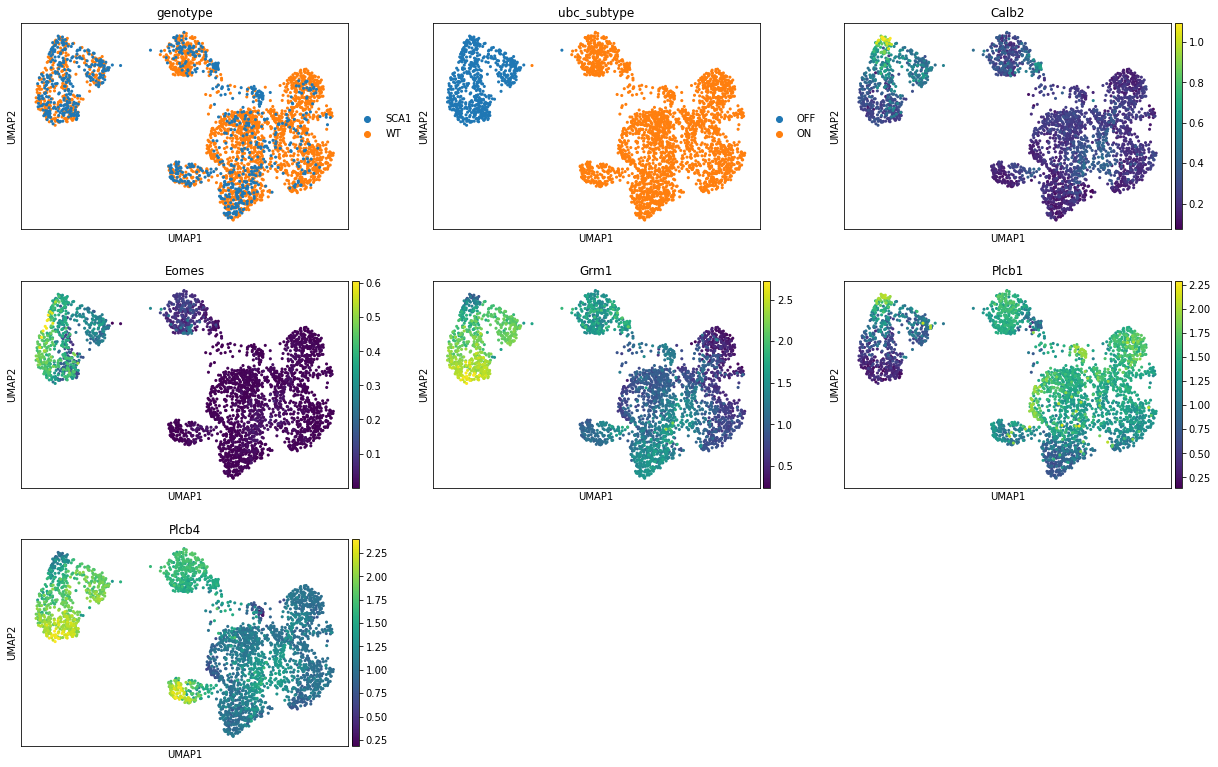

In [34]:
sc.pl.umap(adata, 
           color=['genotype', 'ubc_subtype', 'Calb2', 'Eomes', 'Grm1', 'Plcb1', 'Plcb4'],
           layer='imputed',
           ncols=3,            
           save='ubc_subtype_goi.pdf')

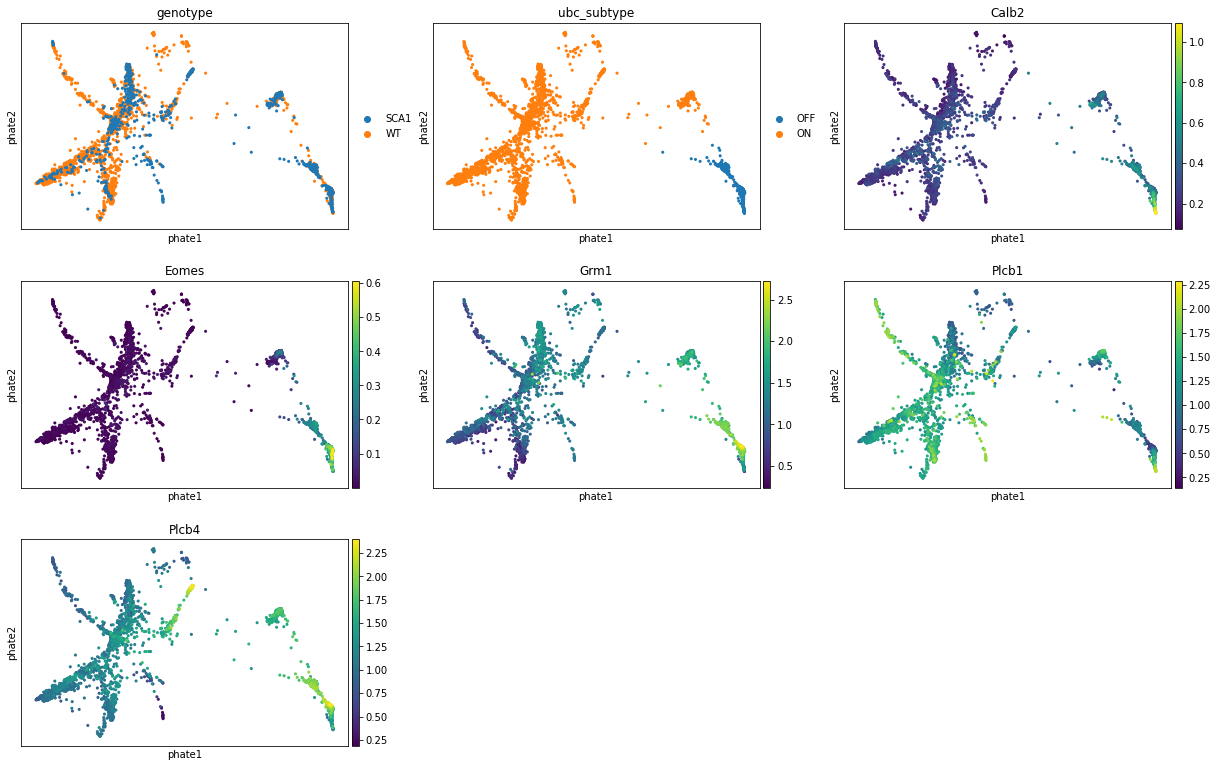

In [33]:
sc.external.pl.phate(adata, 
           color=['genotype', 'ubc_subtype', 'Calb2', 'Eomes', 'Grm1', 'Plcb1', 'Plcb4'],
           layer='imputed',
           ncols=3, 
           save='ubc_subtype_goi.pdf')

In [35]:
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC132444.5', 'Csprs', 'AC132444.6', 'AC125178.3', 'AC125149.3',
       'AC168977.2', 'AC168977.1', 'AC149090.1', 'CAAA01118383.1',
       'CAAA01147332.1'],
      dtype='object', length=26374)

In [36]:
adata.var

,gene_ids,feature_types,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells
Xkr4,ENSMUSG00000051951,Gene Expression,212747,2.995294,1.385117,33.292467,955274.0,13.769754,212747
Gm1992,ENSMUSG00000089699,Gene Expression,43720,0.193306,0.176727,86.291448,61650.0,11.029244,43720
Gm37381,ENSMUSG00000102343,Gene Expression,370,0.001348,0.001347,99.883985,430.0,6.066108,370
Rp1,ENSMUSG00000025900,Gene Expression,3458,0.013329,0.013241,98.915733,4251.0,8.355145,3458
Sox17,ENSMUSG00000025902,Gene Expression,1899,0.013665,0.013572,99.404562,4358.0,8.379998,1899
...,...,...,...,...,...,...,...,...,...
AC168977.2,ENSMUSG00000094915,Gene Expression,12,0.000038,0.000038,99.996237,12.0,2.564949,12
AC168977.1,ENSMUSG00000079808,Gene Expression,47,0.000147,0.000147,99.985263,47.0,3.871201,47
AC149090.1,ENSMUSG00000095041,Gene Expression,186093,1.331366,0.846455,41.649918,424606.0,12.958920,186093
CAAA01118383.1,ENSMUSG00000063897,Gene Expression,15800,0.055910,0.054403,95.045857,17831.0,9.788750,15800
